### M Sequences 2

Can I generate my own m sequence?

Start with a carrier frequency.  $f_c = 75Hz$

Given a time for the sequence $Q=2 \rightarrow T_s = Q / f_c$

And given a m sequence (1023 digital points)

Can I generate a time domain representation?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# See documentation here: https://docs.scipy.org/doc/scipy/tutorial/fft.html
from scipy.fft import fft, fftfreq
import scipy.signal as signal
import scipy.io as io
import os

In [17]:
# This is the directory of helper functions from Rex Andrews
os.listdir("rex/msequence")
import rex.msequence.pulse_compressor3 as pc

In [2]:
f1 = open(os.path.join(os.getcwd(),"rex/msequence/s1333.txt"))
f2 = open(os.path.join(os.getcwd(),"rex/msequence/s3471.txt"))

In [3]:
l1 = f1.readline().rstrip(",").split(",")
l2 = f2.readline().rstrip(",").split(",")
f1.close(); f2.close()

In [4]:
s1333 = [int(x) if x == '1' else -1 for x in l1]
s3471 = [int(x) if x == '1' else -1  for x in l2]

In [5]:
# look at first 20 "digits"
s3471[:20]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1]

In [6]:
def make_signal(m, Q, fc, fs, phi=0.0):
    #fc=75 Hz;   fs=250 Hz;   
    Ts=Q/fc
    t=np.linspace(0, len(m)*Ts, int(fs*len(m)*Ts + 1))
    # laboriously loop through carrier, and phase shift sequence
    p = np.sin(2*np.pi*fc*t + phi)
    for i in range(t.shape[0]):
        if t[i] > 0:
            sidx = int(np.floor(t[i]/Ts))     # Get the index into the m sequence
            if sidx < len(s3471):
                p[i] = p[i]*s3471[sidx]
    return t, p

In [7]:
t[:20]

NameError: name 't' is not defined

In [88]:
t.shape

(65664,)

In [89]:
Ts

0.02666666666666667

In [90]:
c=np.sin(2*np.pi*fc*t+0.005)

In [91]:
# laboriously loop through carrier, and phase shift sequence
p3471 = c
for i in range(t.shape[0]):
    if t[i] > 0:
        sidx = int(np.floor(t[i]/Ts))     # Get the index into the m sequence
        if sidx < len(s3471):
            p3471[i] = p3471[i]*s3471[sidx]

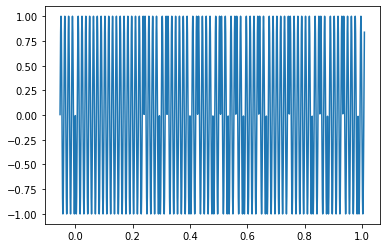

In [93]:
plt.plot(t[:2550],p3471[:2550])

In [83]:
# load data:
# example msequence can be found /Code/UW/acoustics/rex/msequence/
fs, p = io.wavfile.read("rex/msequence/k3471web.wav")

In [94]:
p=p/p.max()

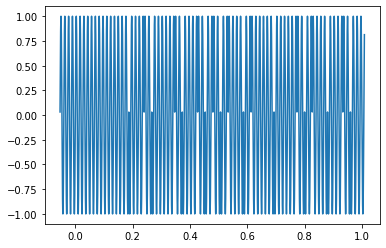

In [95]:
plt.plot(t[:2550],p[:2550])

In [96]:
a = signal.correlate(p3471, p, mode='full', method='direct')/fs

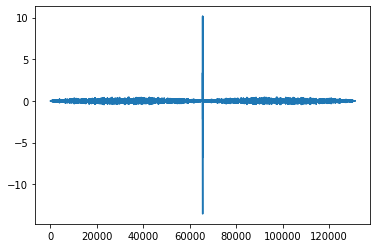

In [97]:
plt.plot(a)